In [30]:
import numpy as np
import matplotlib.pyplot as plt

from qiskit import QuantumRegister, QuantumCircuit, ClassicalRegister
from qiskit.circuit.library import IntegerComparator
from qiskit_algorithms import IterativeAmplitudeEstimation, EstimationProblem
from qiskit_aer.primitives import Sampler
from qiskit_finance.circuit.library import GaussianConditionalIndependenceModel as GCI
import matplotlib.pyplot as plt

import math

# パラメータの設定

In [31]:
num = 12 #株の数（もしくは変動日数）
theta = math.pi/2 #株の上下変動のしやすさ

# 元となる量子状態

In [32]:
qc = QuantumCircuit(num)

for i in range(num):
    qc.ry(theta,i)

qc.draw()

┌─────────┐
 q_0: ┤ Ry(π/2) ├
      ├─────────┤
 q_1: ┤ Ry(π/2) ├
      ├─────────┤
 q_2: ┤ Ry(π/2) ├
      ├─────────┤
 q_3: ┤ Ry(π/2) ├
      ├─────────┤
 q_4: ┤ Ry(π/2) ├
      ├─────────┤
 q_5: ┤ Ry(π/2) ├
      ├─────────┤
 q_6: ┤ Ry(π/2) ├
      ├─────────┤
 q_7: ┤ Ry(π/2) ├
      ├─────────┤
 q_8: ┤ Ry(π/2) ├
      ├─────────┤
 q_9: ┤ Ry(π/2) ├
      ├─────────┤
q_10: ┤ Ry(π/2) ├
      ├─────────┤
q_11: ┤ Ry(π/2) ├
      └─────────┘

In [33]:
qc_measure = qc.measure_all(inplace=False)

sampler = Sampler()
job = sampler.run(qc_measure)
binary_probabilities = job.result().quasi_dists[0].binary_probabilities()

In [34]:
qubit_state = []

for i, prob in binary_probabilities.items():
    print(i,prob)
    qubit_state.append([i,prob])

qubit_state.sort()

000011011110 0.0009765625
000110010010 0.0009765625
110001111010 0.0009765625
100111111001 0.0009765625
110111010001 0.0009765625
110000010110 0.0009765625
000101111000 0.0009765625
001110010101 0.0009765625
111111100101 0.0009765625
101011100111 0.0009765625
011110000010 0.0009765625
011010110110 0.0009765625
011110001100 0.0009765625
001010100110 0.0009765625
111100011110 0.0009765625
011000110010 0.0009765625
011000011100 0.0009765625
101001111011 0.0009765625
001111100010 0.0009765625
001000111001 0.0009765625
110110111101 0.0009765625
001101110101 0.0009765625
110010011001 0.0009765625
011101011000 0.0009765625
000011000100 0.0009765625
110111000000 0.0009765625
001001111010 0.0009765625
001111100011 0.0009765625
111110000101 0.0009765625
110001110111 0.0009765625
110010111100 0.0009765625
101100101110 0.0009765625
100001101001 0.0009765625
100110111101 0.0009765625
100100010101 0.0009765625
101101111101 0.0009765625
101011011010 0.0009765625
100101111111 0.0009765625
110101100000

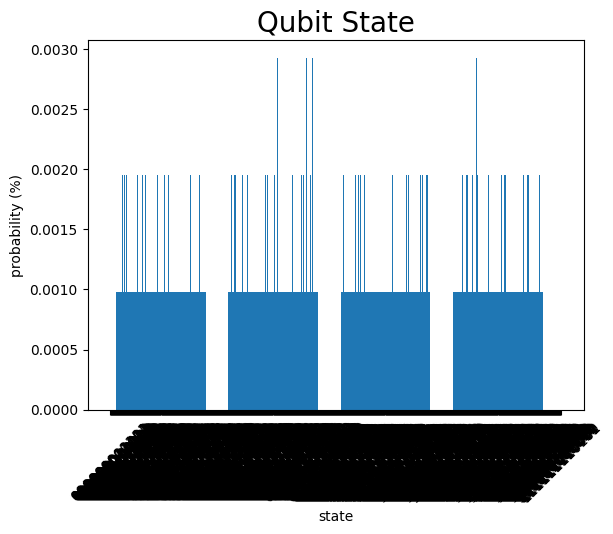

In [35]:
# plot probabilities of each states
q_state = []
q_prob = []
for state in qubit_state:
    q_state.append(state[0])
    q_prob.append(state[1])

plt.bar(q_state,q_prob)
#plt.legend(fontsize=15)
plt.xlabel("state", size=10)
plt.ylabel("probability (%)", size=10)
plt.title("Qubit State", size=20)
plt.xticks(size=10,rotation=45)
plt.yticks(size=10)
plt.show()

# 変動分の足し合わせ

In [38]:
from qiskit.circuit.library import WeightedAdder
from qiskit.circuit.library import LinearAmplitudeFunction

agg = WeightedAdder(num, [6,4,6,4,6,4,7,4,7,4,7,4])

qr_state = QuantumRegister(qc.num_qubits, "state")
qr_sum = QuantumRegister(agg.num_sum_qubits, "sum")
qr_carry = QuantumRegister(agg.num_carry_qubits+1, "carry")
cr = ClassicalRegister(agg.num_sum_qubits, "value")

L_sum_state = QuantumCircuit(qr_state, qr_sum, qr_carry, cr)

# load the variable
L_sum_state.append(qc.to_gate(), qr_state)

# aggregate
L_sum_state.append(agg.to_gate(), qr_state[:] + qr_sum[:] + qr_carry[:])

L_sum_state.measure(qr_sum[:],cr[:])

L_sum_state.draw()

┌───────────────┐┌─────────┐                  
 state_0: ┤0              ├┤0        ├──────────────────
          │               ││         │                  
 state_1: ┤1              ├┤1        ├──────────────────
          │               ││         │                  
 state_2: ┤2              ├┤2        ├──────────────────
          │               ││         │                  
 state_3: ┤3              ├┤3        ├──────────────────
          │               ││         │                  
 state_4: ┤4              ├┤4        ├──────────────────
          │               ││         │                  
 state_5: ┤5              ├┤5        ├──────────────────
          │   circuit-250 ││         │                  
 state_6: ┤6              ├┤6        ├──────────────────
          │               ││         │                  
 state_7: ┤7              ├┤7        ├──────────────────
          │               ││         │                  
 state_8: ┤8              ├┤8        ├──────────────────
          │               ││         │                  
 state_9: ┤9              ├┤9        ├──────────────────
          │               ││         │                  
state_10: ┤10             ├┤10       ├──────────────────
          │               ││         │                  
state_11: ┤11             ├┤11       ├──────────────────
          └───────────────┘│   adder │┌─┐               
   sum_0: ─────────────────┤12       ├┤M├───────────────
                           │         │└╥┘┌─┐            
   sum_1: ─────────────────┤13       ├─╫─┤M├────────────
                           │         │ ║ └╥┘┌─┐         
   sum_2: ─────────────────┤14       ├─╫──╫─┤M├─────────
                           │         │ ║  ║ └╥┘┌─┐      
   sum_3: ─────────────────┤15       ├─╫──╫──╫─┤M├──────
                           │         │ ║  ║  ║ └╥┘┌─┐   
   sum_4: ─────────────────┤16       ├─╫──╫──╫──╫─┤M├───
                           │         │ ║  ║  ║  ║ └╥┘┌─┐
   sum_5: ─────────────────┤17       ├─╫──╫──╫──╫──╫─┤M├
                           │         │ ║  ║  ║  ║  ║ └╥┘
 carry_0: ─────────────────┤18       ├─╫──╫──╫──╫──╫──╫─
                           │         │ ║  ║  ║  ║  ║  ║ 
 carry_1: ─────────────────┤19       ├─╫──╫──╫──╫──╫──╫─
                           │         │ ║  ║  ║  ║  ║  ║ 
 carry_2: ─────────────────┤20       ├─╫──╫──╫──╫──╫──╫─
                           │         │ ║  ║  ║  ║  ║  ║ 
 carry_3: ─────────────────┤21       ├─╫──╫──╫──╫──╫──╫─
                           │         │ ║  ║  ║  ║  ║  ║ 
 carry_4: ─────────────────┤22       ├─╫──╫──╫──╫──╫──╫─
                           │         │ ║  ║  ║  ║  ║  ║ 
 carry_5: ─────────────────┤23       ├─╫──╫──╫──╫──╫──╫─
                           └─────────┘ ║  ║  ║  ║  ║  ║ 
 value: 6/═════════════════════════════╩══╩══╩══╩══╩══╩═
                                       0  1  2  3  4  5

In [39]:
sampler = Sampler()
job = sampler.run(L_sum_state)
binary_probabilities = job.result().quasi_dists[0].binary_probabilities()

In [40]:
qubit_state_L = []

for i, prob in binary_probabilities.items():
    print(i,prob)
    qubit_state_L.append([i,prob])

qubit_state_L.sort()

001101 0.0009765625
001111 0.01171875
110101 0.0048828125
100001 0.029296875
111001 0.0009765625
110100 0.0009765625
101110 0.0107421875
011100 0.0380859375
101111 0.005859375
011110 0.01953125
001000 0.00390625
011011 0.0361328125
001011 0.001953125
101000 0.0283203125
001100 0.0078125
000100 0.0029296875
100000 0.046875
010100 0.015625
010000 0.009765625
100110 0.044921875
110000 0.0078125
101011 0.0224609375
110010 0.0029296875
011010 0.02734375
100010 0.0400390625
011000 0.0244140625
100101 0.02734375
010010 0.021484375
101101 0.0185546875
110011 0.0048828125
100100 0.037109375
010111 0.0263671875
010110 0.0166015625
010001 0.01171875
100111 0.0263671875
101100 0.0146484375
101001 0.0263671875
011111 0.0595703125
100011 0.0419921875
101010 0.0478515625
011101 0.0400390625
110001 0.015625
110111 0.005859375
011001 0.0556640625
001010 0.0087890625
010101 0.0224609375
010011 0.015625
001110 0.0087890625


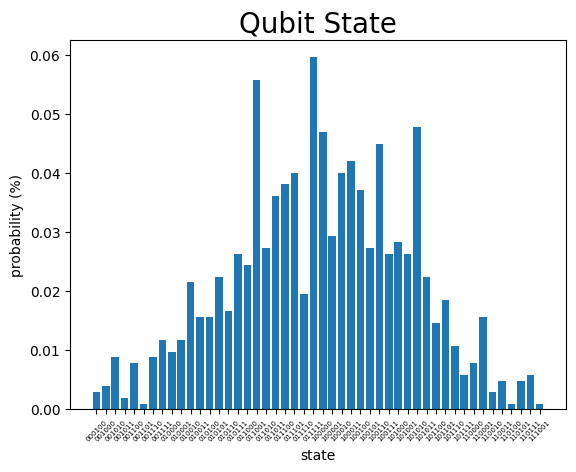

In [42]:
# plot probabilities of each states
q_state_L = []
q_prob_L = []
for state in qubit_state_L:
    q_state_L.append(state[0])
    q_prob_L.append(state[1])

plt.bar(q_state_L,q_prob_L)
#plt.legend(fontsize=15)
plt.xlabel("state", size=10)
plt.ylabel("probability (%)", size=10)
plt.title("Qubit State", size=20)
plt.xticks(size=5,rotation=45)
plt.yticks(size=10)
plt.show()

# 量子位相推定によるLの推定

In [11]:
# define linear objective function
breakpoints = [0]
slopes = [1]
offsets = [0]
f_min = 0
f_max = sum([1]*num)
c_approx = 0.25

objective = LinearAmplitudeFunction(
    agg.num_sum_qubits,
    slope=slopes,
    offset=offsets,
    # max value that can be reached by the qubit register (will not always be reached)
    domain=(0, 2**agg.num_sum_qubits - 1),
    image=(f_min, f_max),
    rescaling_factor=c_approx,
    breakpoints=breakpoints,
)

In [12]:
# define the registers for convenience and readability
qr_state = QuantumRegister(qc.num_qubits, "state")
qr_sum = QuantumRegister(agg.num_sum_qubits, "sum")
qr_carry = QuantumRegister(agg.num_carry_qubits+1, "carry")
qr_obj = QuantumRegister(1, "objective")

# define the circuit
state_preparation = QuantumCircuit(qr_state, qr_obj, qr_sum, qr_carry, name="A")

# load the random variable
state_preparation.append(qc.to_gate(), qr_state)

# aggregate
state_preparation.append(agg.to_gate(), qr_state[:] + qr_sum[:] + qr_carry[:])

# linear objective function
state_preparation.append(objective.to_gate(), qr_sum[:] + qr_obj[:])

# uncompute aggregation
state_preparation.append(agg.to_gate().inverse(), qr_state[:] + qr_sum[:] + qr_carry[:])

# draw the circuit
state_preparation.draw()

┌──────────────┐┌────────┐      ┌───────────┐
  state_0: ┤0             ├┤0       ├──────┤0          ├
           │              ││        │      │           │
  state_1: ┤1             ├┤1       ├──────┤1          ├
           │  circuit-158 ││        │      │           │
  state_2: ┤2             ├┤2       ├──────┤2          ├
           │              ││        │      │           │
  state_3: ┤3             ├┤3       ├──────┤3          ├
           └──────────────┘│        │┌────┐│           │
objective: ────────────────┤        ├┤3   ├┤           ├
                           │        ││    ││           │
    sum_0: ────────────────┤4 adder ├┤0   ├┤4 adder_dg ├
                           │        ││  F ││           │
    sum_1: ────────────────┤5       ├┤1   ├┤5          ├
                           │        ││    ││           │
    sum_2: ────────────────┤6       ├┤2   ├┤6          ├
                           │        │└────┘│           │
  carry_0: ────────────────┤7       ├──────┤7          ├
                           │        │      │           │
  carry_1: ────────────────┤8       ├──────┤8          ├
                           │        │      │           │
  carry_2: ────────────────┤9       ├──────┤9          ├
                           └────────┘      └───────────┘

In [13]:
epsilon = 0.01
alpha = 0.1

problem = EstimationProblem(
    state_preparation=state_preparation,
    objective_qubits=[len(qr_state)],
    post_processing=objective.post_processing,
)
# construct amplitude estimation
ae = IterativeAmplitudeEstimation(
    epsilon_target=epsilon, alpha=alpha, sampler=Sampler(run_options={"shots": 100, "seed": 75})
)
result = ae.estimate(problem)

In [14]:
print(result.estimation_processed)

2.01343163913194


# 量子位相推定によるVaR推定

In [19]:
# set x value to estimate the CDF
x_eval = 1

comparator = IntegerComparator(agg.num_sum_qubits, x_eval + 1, geq=False)
comparator.draw()

┌──────┐
state_0: ┤0     ├
         │      │
state_1: ┤1     ├
         │      │
state_2: ┤2     ├
         │  cmp │
compare: ┤3     ├
         │      │
  a21_0: ┤4     ├
         │      │
  a21_1: ┤5     ├
         └──────┘

In [21]:
def get_cdf_circuit(x_eval):
    # define the registers for convenience and readability
    qr_state = QuantumRegister(qc.num_qubits, "state")
    qr_sum = QuantumRegister(agg.num_sum_qubits, "sum")
    qr_carry = QuantumRegister(agg.num_carry_qubits+1, "carry")
    qr_obj = QuantumRegister(1, "objective")
    qr_compare = QuantumRegister(1, "compare")

    # define the circuit
    state_preparation = QuantumCircuit(qr_state, qr_obj, qr_sum, qr_carry, name="A")

    # load the random variable
    state_preparation.append(qc, qr_state)

    # aggregate
    state_preparation.append(agg, qr_state[:] + qr_sum[:] + qr_carry[:])

    # comparator objective function
    comparator = IntegerComparator(agg.num_sum_qubits, x_eval + 1, geq=False)
    state_preparation.append(comparator, qr_sum[:] + qr_obj[:] + qr_carry[:-1])

    # uncompute aggregation
    state_preparation.append(agg.inverse(), qr_state[:] + qr_sum[:] + qr_carry[:])

    return state_preparation


state_preparation = get_cdf_circuit(x_eval)
state_preparation.draw()

┌──────────────┐┌────────┐        ┌───────────┐
  state_0: ┤0             ├┤0       ├────────┤0          ├
           │              ││        │        │           │
  state_1: ┤1             ├┤1       ├────────┤1          ├
           │  circuit-158 ││        │        │           │
  state_2: ┤2             ├┤2       ├────────┤2          ├
           │              ││        │        │           │
  state_3: ┤3             ├┤3       ├────────┤3          ├
           └──────────────┘│        │┌──────┐│           │
objective: ────────────────┤        ├┤3     ├┤           ├
                           │        ││      ││           │
    sum_0: ────────────────┤4 adder ├┤0     ├┤4 adder_dg ├
                           │        ││      ││           │
    sum_1: ────────────────┤5       ├┤1     ├┤5          ├
                           │        ││  cmp ││           │
    sum_2: ────────────────┤6       ├┤2     ├┤6          ├
                           │        ││      ││           │
  carry_0: ────────────────┤7       ├┤4     ├┤7          ├
                           │        ││      ││           │
  carry_1: ────────────────┤8       ├┤5     ├┤8          ├
                           │        │└──────┘│           │
  carry_2: ────────────────┤9       ├────────┤9          ├
                           └────────┘        └───────────┘

In [22]:
# set target precision and confidence level
epsilon = 0.01

problem = EstimationProblem(state_preparation=state_preparation, objective_qubits=[len(qr_state)])
# construct amplitude estimation
ae_cdf = IterativeAmplitudeEstimation(
    epsilon_target=epsilon, alpha=alpha, sampler=Sampler(run_options={"shots": 100, "seed": 75})
)
result_cdf = ae_cdf.estimate(problem)

In [23]:
def run_ae_for_cdf(x_eval, epsilon=0.01, alpha=0.05):

    # construct amplitude estimation
    state_preparation = get_cdf_circuit(x_eval)
    problem = EstimationProblem(
        state_preparation=state_preparation, objective_qubits=[len(qr_state)]
    )
    ae_var = IterativeAmplitudeEstimation(
        epsilon_target=epsilon, alpha=alpha, sampler=Sampler(run_options={"shots": 100, "seed": 75})
    )
    result_var = ae_var.estimate(problem)

    return result_var.estimation

In [24]:
def bisection_search(
    objective, target_value, low_level, high_level, low_value=None, high_value=None
):
    """
    Determines the smallest level such that the objective value is still larger than the target
    :param objective: objective function
    :param target: target value
    :param low_level: lowest level to be considered
    :param high_level: highest level to be considered
    :param low_value: value of lowest level (will be evaluated if set to None)
    :param high_value: value of highest level (will be evaluated if set to None)
    :return: dictionary with level, value, num_eval
    """

    # check whether low and high values are given and evaluated them otherwise
    print("--------------------------------------------------------------------")
    print("start bisection search for target value %.3f" % target_value)
    print("--------------------------------------------------------------------")
    num_eval = 0
    if low_value is None:
        low_value = objective(low_level)
        num_eval += 1
    if high_value is None:
        high_value = objective(high_level)
        num_eval += 1

    # check if low_value already satisfies the condition
    if low_value > target_value:
        return {
            "level": low_level,
            "value": low_value,
            "num_eval": num_eval,
            "comment": "returned low value",
        }
    elif low_value == target_value:
        return {"level": low_level, "value": low_value, "num_eval": num_eval, "comment": "success"}

    # check if high_value is above target
    if high_value < target_value:
        return {
            "level": high_level,
            "value": high_value,
            "num_eval": num_eval,
            "comment": "returned low value",
        }
    elif high_value == target_value:
        return {
            "level": high_level,
            "value": high_value,
            "num_eval": num_eval,
            "comment": "success",
        }

    # perform bisection search until
    print("low_level    low_value    level    value    high_level    high_value")
    print("--------------------------------------------------------------------")
    while high_level - low_level > 1:

        level = int(np.round((high_level + low_level) / 2.0))
        num_eval += 1
        value = objective(level)

        print(
            "%2d           %.3f        %2d       %.3f    %2d            %.3f"
            % (low_level, low_value, level, value, high_level, high_value)
        )

        if value >= target_value:
            high_level = level
            high_value = value
        else:
            low_level = level
            low_value = value

    # return high value after bisection search
    print("--------------------------------------------------------------------")
    print("finished bisection search")
    print("--------------------------------------------------------------------")
    return {"level": high_level, "value": high_value, "num_eval": num_eval, "comment": "success"}

In [27]:
losses = [0,5]

# run bisection search to determine VaR
objective = lambda x: run_ae_for_cdf(x)
bisection_result = bisection_search(
    objective, 1 - alpha, min(losses), max(losses), low_value=0, high_value=1
)
var = bisection_result["level"]

--------------------------------------------------------------------
start bisection search for target value 0.900
--------------------------------------------------------------------
low_level    low_value    level    value    high_level    high_value
--------------------------------------------------------------------
 0           0.000         2       0.686     5            1.000
 2           0.686         4       1.000     5            1.000
 2           0.686         3       0.937     4            1.000
--------------------------------------------------------------------
finished bisection search
--------------------------------------------------------------------


In [28]:
print("Estimated Value at Risk: %2d" % var)
print("Estimated Probability:    %.3f" % bisection_result["value"])

Estimated Value at Risk:  3
Estimated Probability:    0.937
